In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
db = pd.read_csv('MapsResultsIntegrity.csv')
db

,State Name,NumberDIstricts,Cluster_Avg_Distance,District_Avg_Distance,District-Cluster Difference,State,Integrity Index,Public Access to Information,Political Financing,Executive Accountability,...,Judicial Accountability,State Budget Processes,State Civil Service Management,Procurement,Internal Auditing,Lobbying Disclosure,State Pension Fund Management,Ethics Enforcement Agencies,State Insurance Commissions,Redistricting
0,Alabama,7,60840.42103,69162.93535,8322.51432,1,71.774636,56.944444,43.940146,76.333333,...,80.116071,75.138889,86.309524,89.285714,93.750000,71.180556,64.672619,77.951389,88.888889,40
1,Arizona,9,53998.42873,74140.02983,20141.60110,4,68.060032,77.777778,67.303241,73.611111,...,80.267857,75.277778,54.851190,69.642857,85.416667,57.291667,39.494048,55.295139,52.777778,95
2,Arkansas,4,80936.14729,86976.05993,6039.91264,5,68.262590,54.166667,65.874669,73.222222,...,70.276786,73.750000,61.964286,80.357143,92.708333,73.611111,42.529762,74.479167,60.069444,65
3,California,53,20231.82632,33065.68108,12833.85476,6,80.801516,61.111111,80.491071,83.388889,...,71.360119,72.361111,77.529762,87.500000,91.666667,91.666667,74.375000,83.506944,81.597222,100
4,Colorado,7,45188.78001,58745.98835,13557.20834,8,66.945590,33.333333,75.254630,77.333333,...,76.151786,89.305556,56.934524,83.035714,89.583333,72.222222,52.142857,34.288194,57.986111,70
5,Connecticut,5,22599.03188,26291.51755,3692.48567,9,86.415320,88.888889,96.056548,79.305556,...,69.681548,85.555556,77.708333,91.071429,90.625000,84.027778,90.178571,90.451389,89.930556,100
6,Florida,27,27027.02933,45458.66308,18431.63375,12,71.337349,66.666667,60.577050,70.861111,...,61.208333,73.055556,61.250000,83.035714,95.833333,65.277778,64.255952,56.076389,69.791667,100
7,Georgia,14,42651.09907,56391.68703,13740.58796,13,49.079554,45.833333,57.958003,62.222222,...,71.556548,63.611111,24.553571,65.178571,85.416667,54.513889,23.005952,0.000000,31.597222,45
8,Hawaii,2,96806.97003,102291.48470,5484.51467,15,73.630882,65.277778,85.699405,79.111111,...,67.264881,64.027778,65.982143,88.392857,91.666667,62.500000,68.125000,74.826389,57.291667,90
9,Idaho,2,179234.96520,200285.23600,21050.27080,16,61.122331,72.222222,75.152116,52.444444,...,61.348214,79.166667,40.386905,80.357143,89.583333,78.472222,32.023810,0.000000,47.222222,100


In [5]:
y_names = db.keys()[6:]
y_names

Index([u'Integrity Index', u'Public Access to Information', u'Political Financing', u'Executive Accountability', u'Legislative Accountability', u'Judicial Accountability', u'State Budget Processes', u'State Civil Service Management', u'Procurement', u'Internal Auditing', u'Lobbying Disclosure', u'State Pension Fund Management', u'Ethics Enforcement Agencies', u'State Insurance Commissions', u'Redistricting'], dtype='object')

                            OLS Regression Results                            
Dep. Variable:        Integrity Index   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.968
Date:                Thu, 21 May 2015   Prob (F-statistic):             0.0268
Time:                        23:02:24   Log-Likelihood:                -147.29
No. Observations:                  43   AIC:                             300.6
Df Residuals:                      40   BIC:                             305.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const             

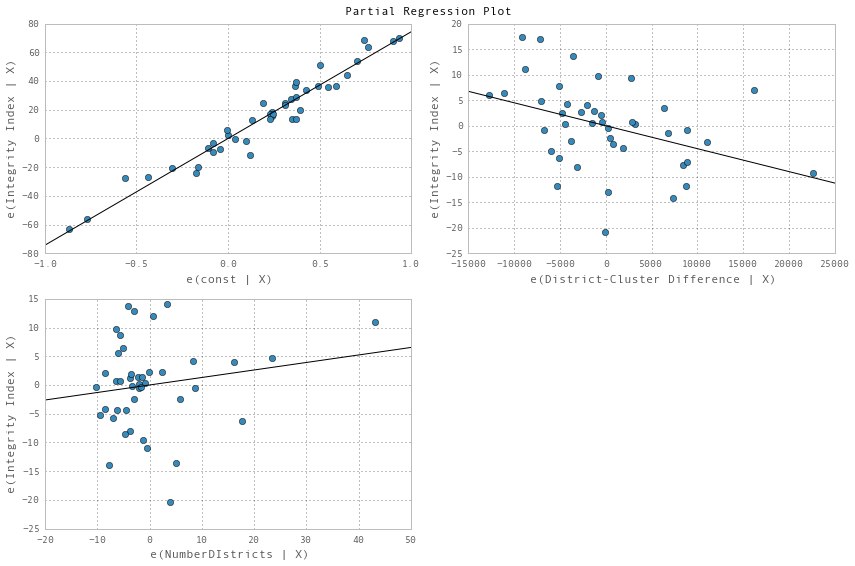

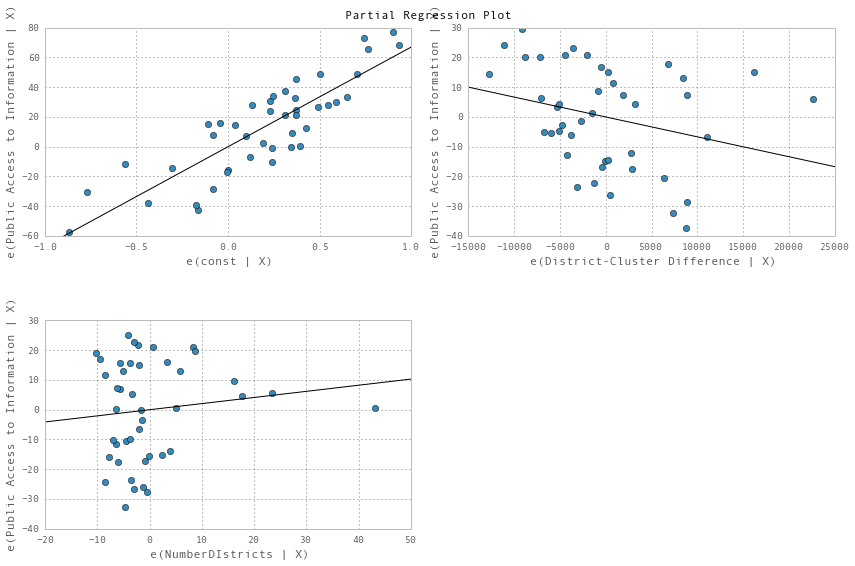

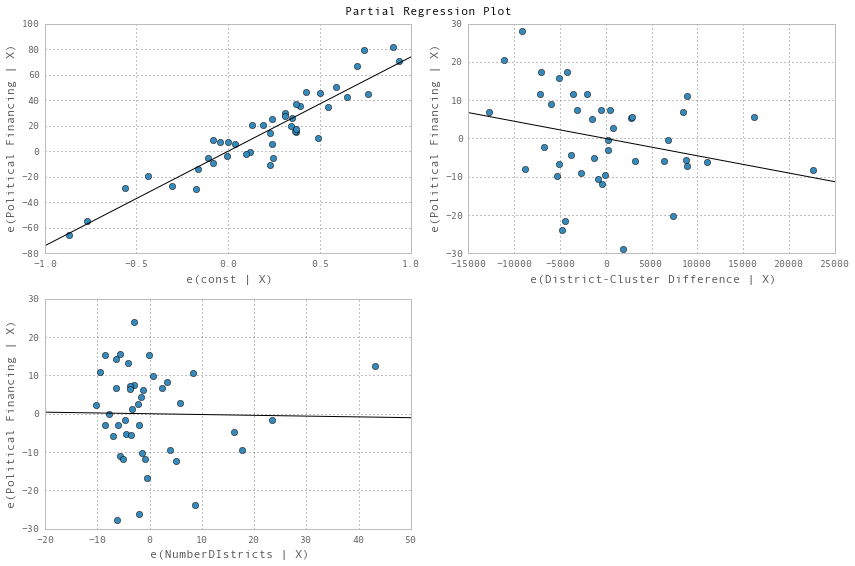

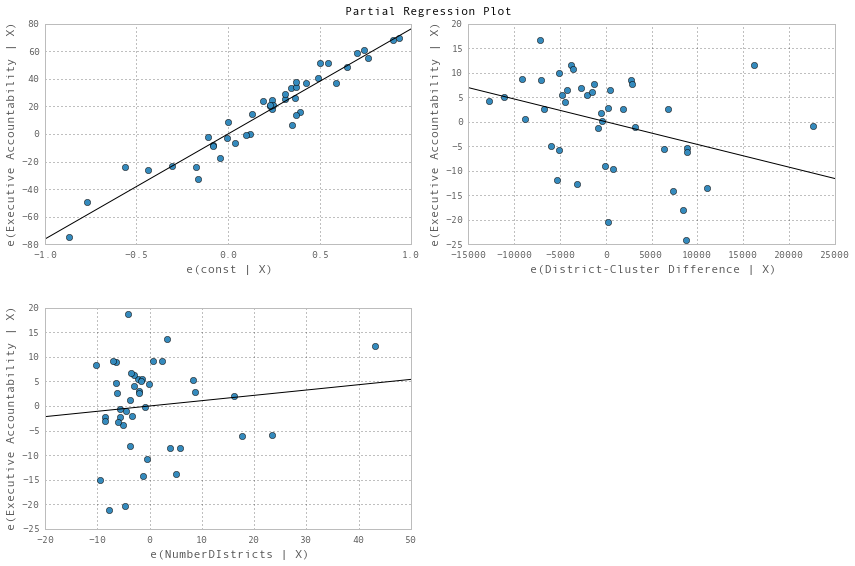

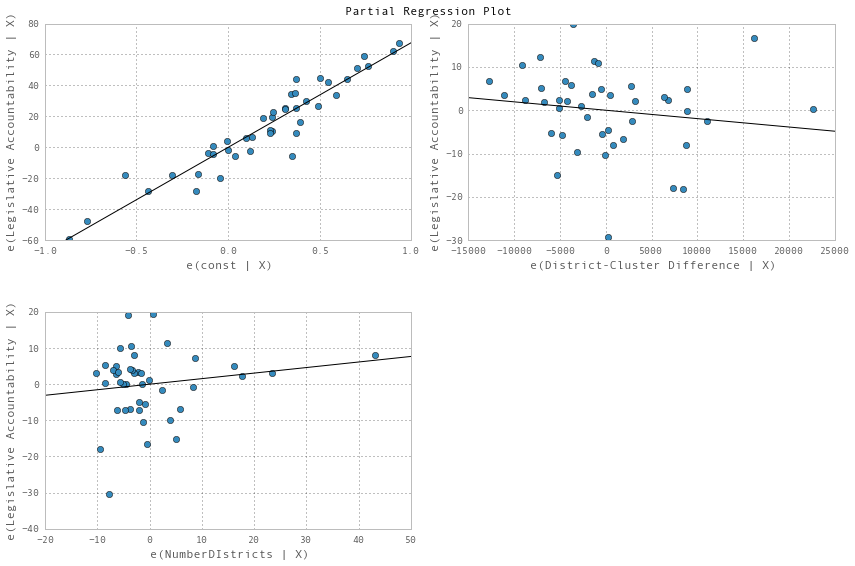

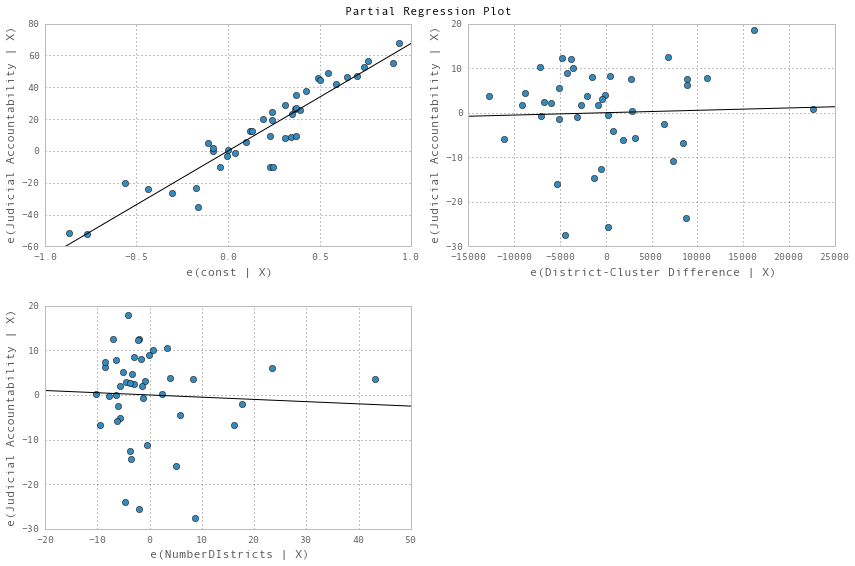

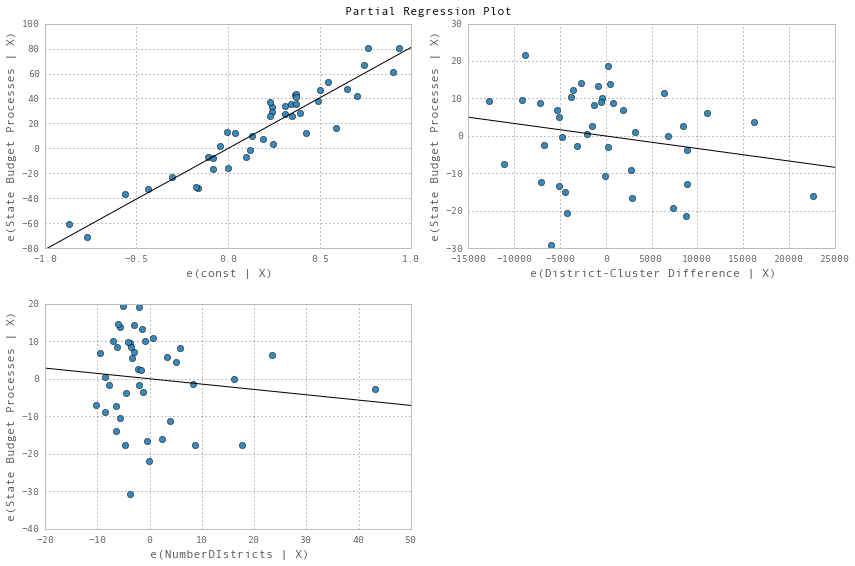

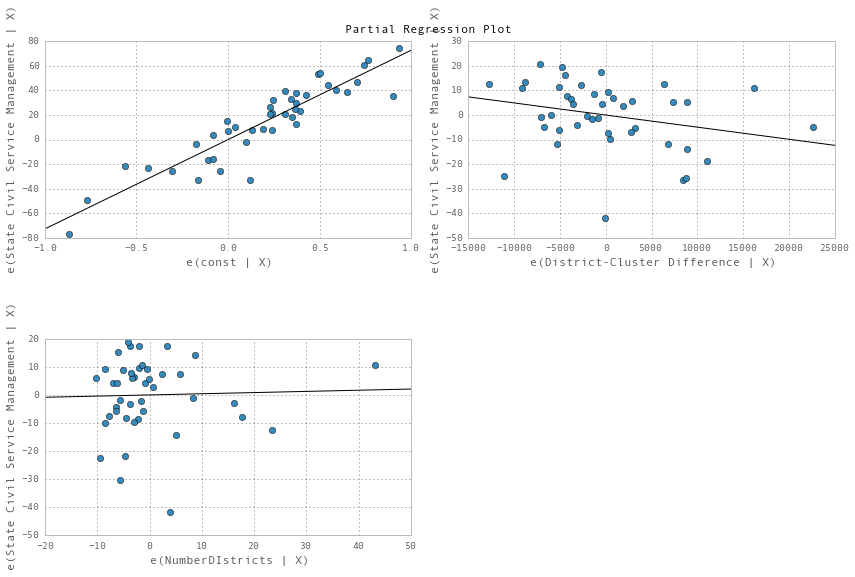

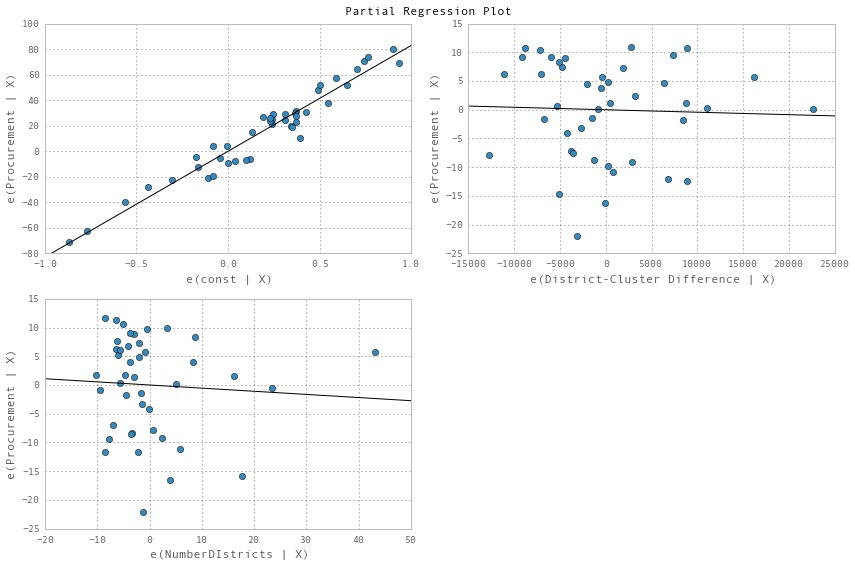

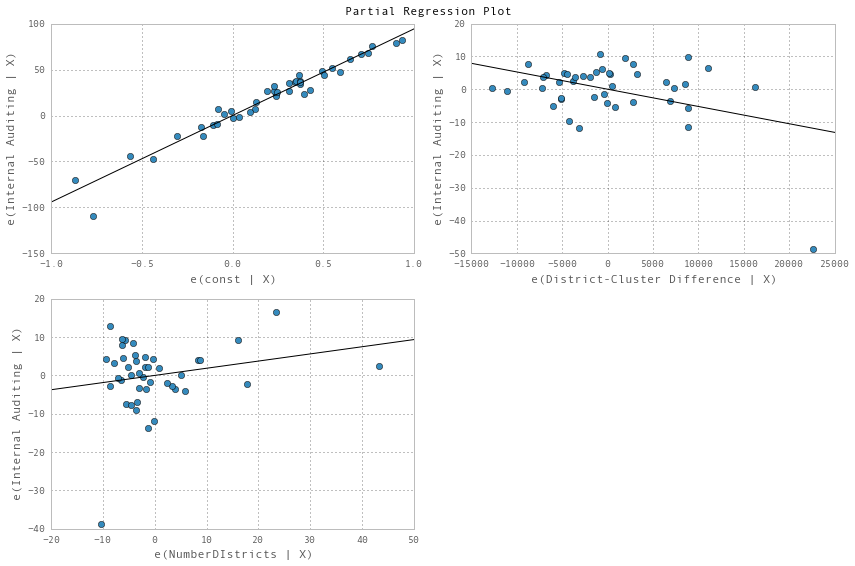

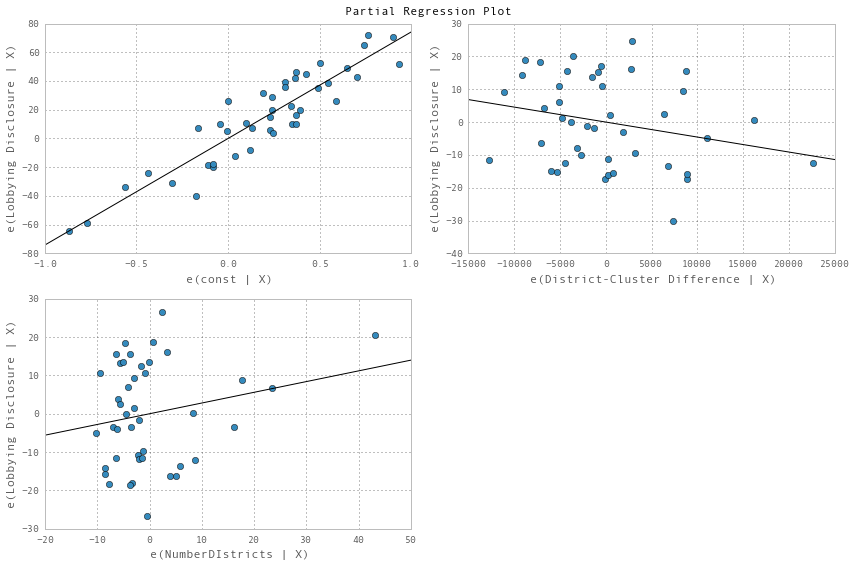

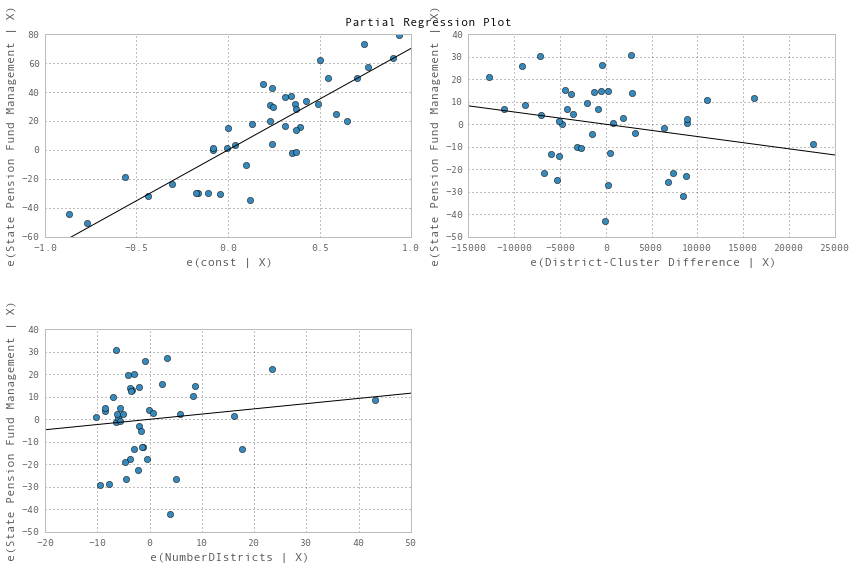

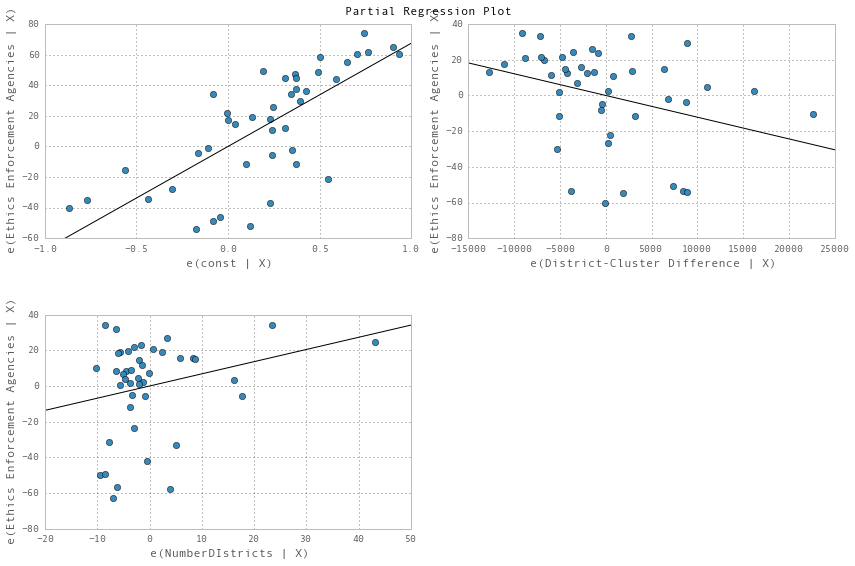

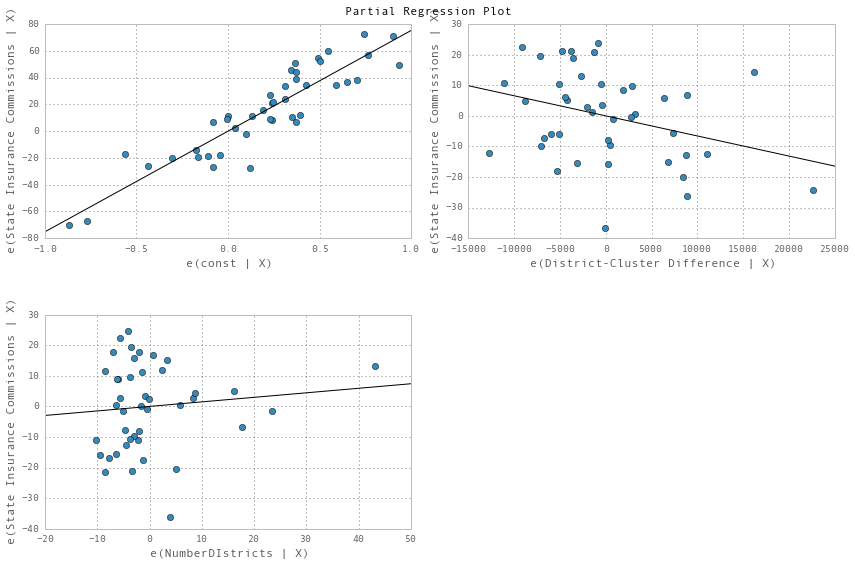

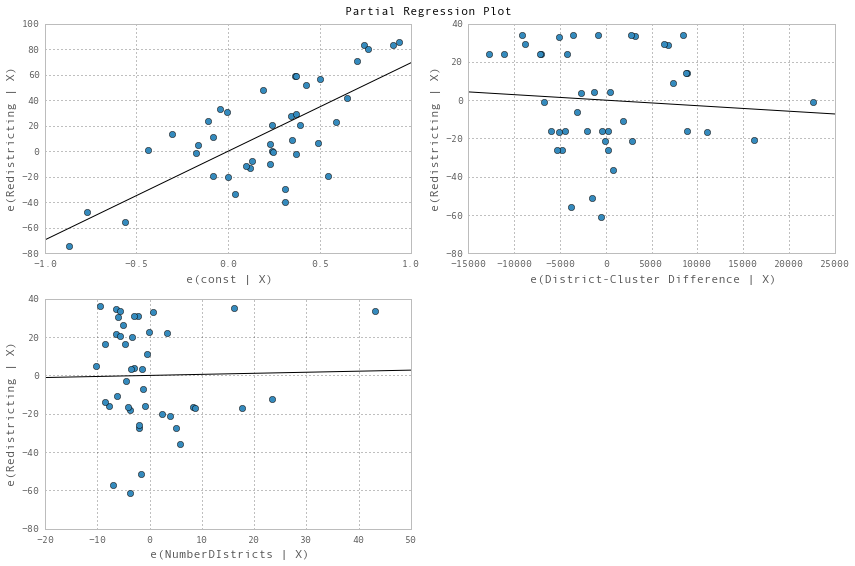

In [6]:
X = db[['District-Cluster Difference','NumberDIstricts']]
X = sm.add_constant(X)
for var in y_names:
    Y = db[var]
    model = sm.OLS(Y,X)
    res = model.fit()
    print res.summary()
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(res, fig=fig)

In [15]:
import scipy.stats as stats
import pprint
X = db['District-Cluster Difference']
res = {}
for var in y_names:
    Y = db[var]
    tmp = stats.spearmanr(X,Y)
    res[var] = tmp
res_DF = pd.DataFrame(res, index=['rho','p-val'])
res_DF.transpose()

,rho,p-val
Ethics Enforcement Agencies,-0.347905,0.022250
Executive Accountability,-0.383886,0.011043
Integrity Index,-0.409846,0.006345
Internal Auditing,-0.075759,0.629209
Judicial Accountability,-0.059499,0.704689
Legislative Accountability,-0.251482,0.103791
Lobbying Disclosure,-0.199600,0.199403
Political Financing,-0.260948,0.090998
Procurement,-0.129296,0.408610
Public Access to Information,-0.317213,0.038202
